# B1. Walker plot

## B1.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import emcee
from scipy.stats import gaussian_kde

## B1.2. <a href="https://www.dropbox.com/s/kswykzkuv1suutk/walker-plot_appendixB.zip?dl=1">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── thermal-gs.mplstyle
│   ├── UXArietis_chain_burnin.h5
│   ├── ...
├── figures
│   ├── ux-arietis_walkerplot_burnin.pdf
│   ├── ux-arietis_walkerplot_burnin.png
│   ├── ...
├── notebooks
│   ├── walker-plot_appendixB.ipynb
│   ├── ...
.
.
.

## B1.3. Load

In [2]:
sampler = emcee.backends.HDFBackend('../data/UXArietis_chain_burnin.h5')
samples = sampler.get_chain()

plt.style.use('../data/thermal-gs.mplstyle')

## B1.4. Plot

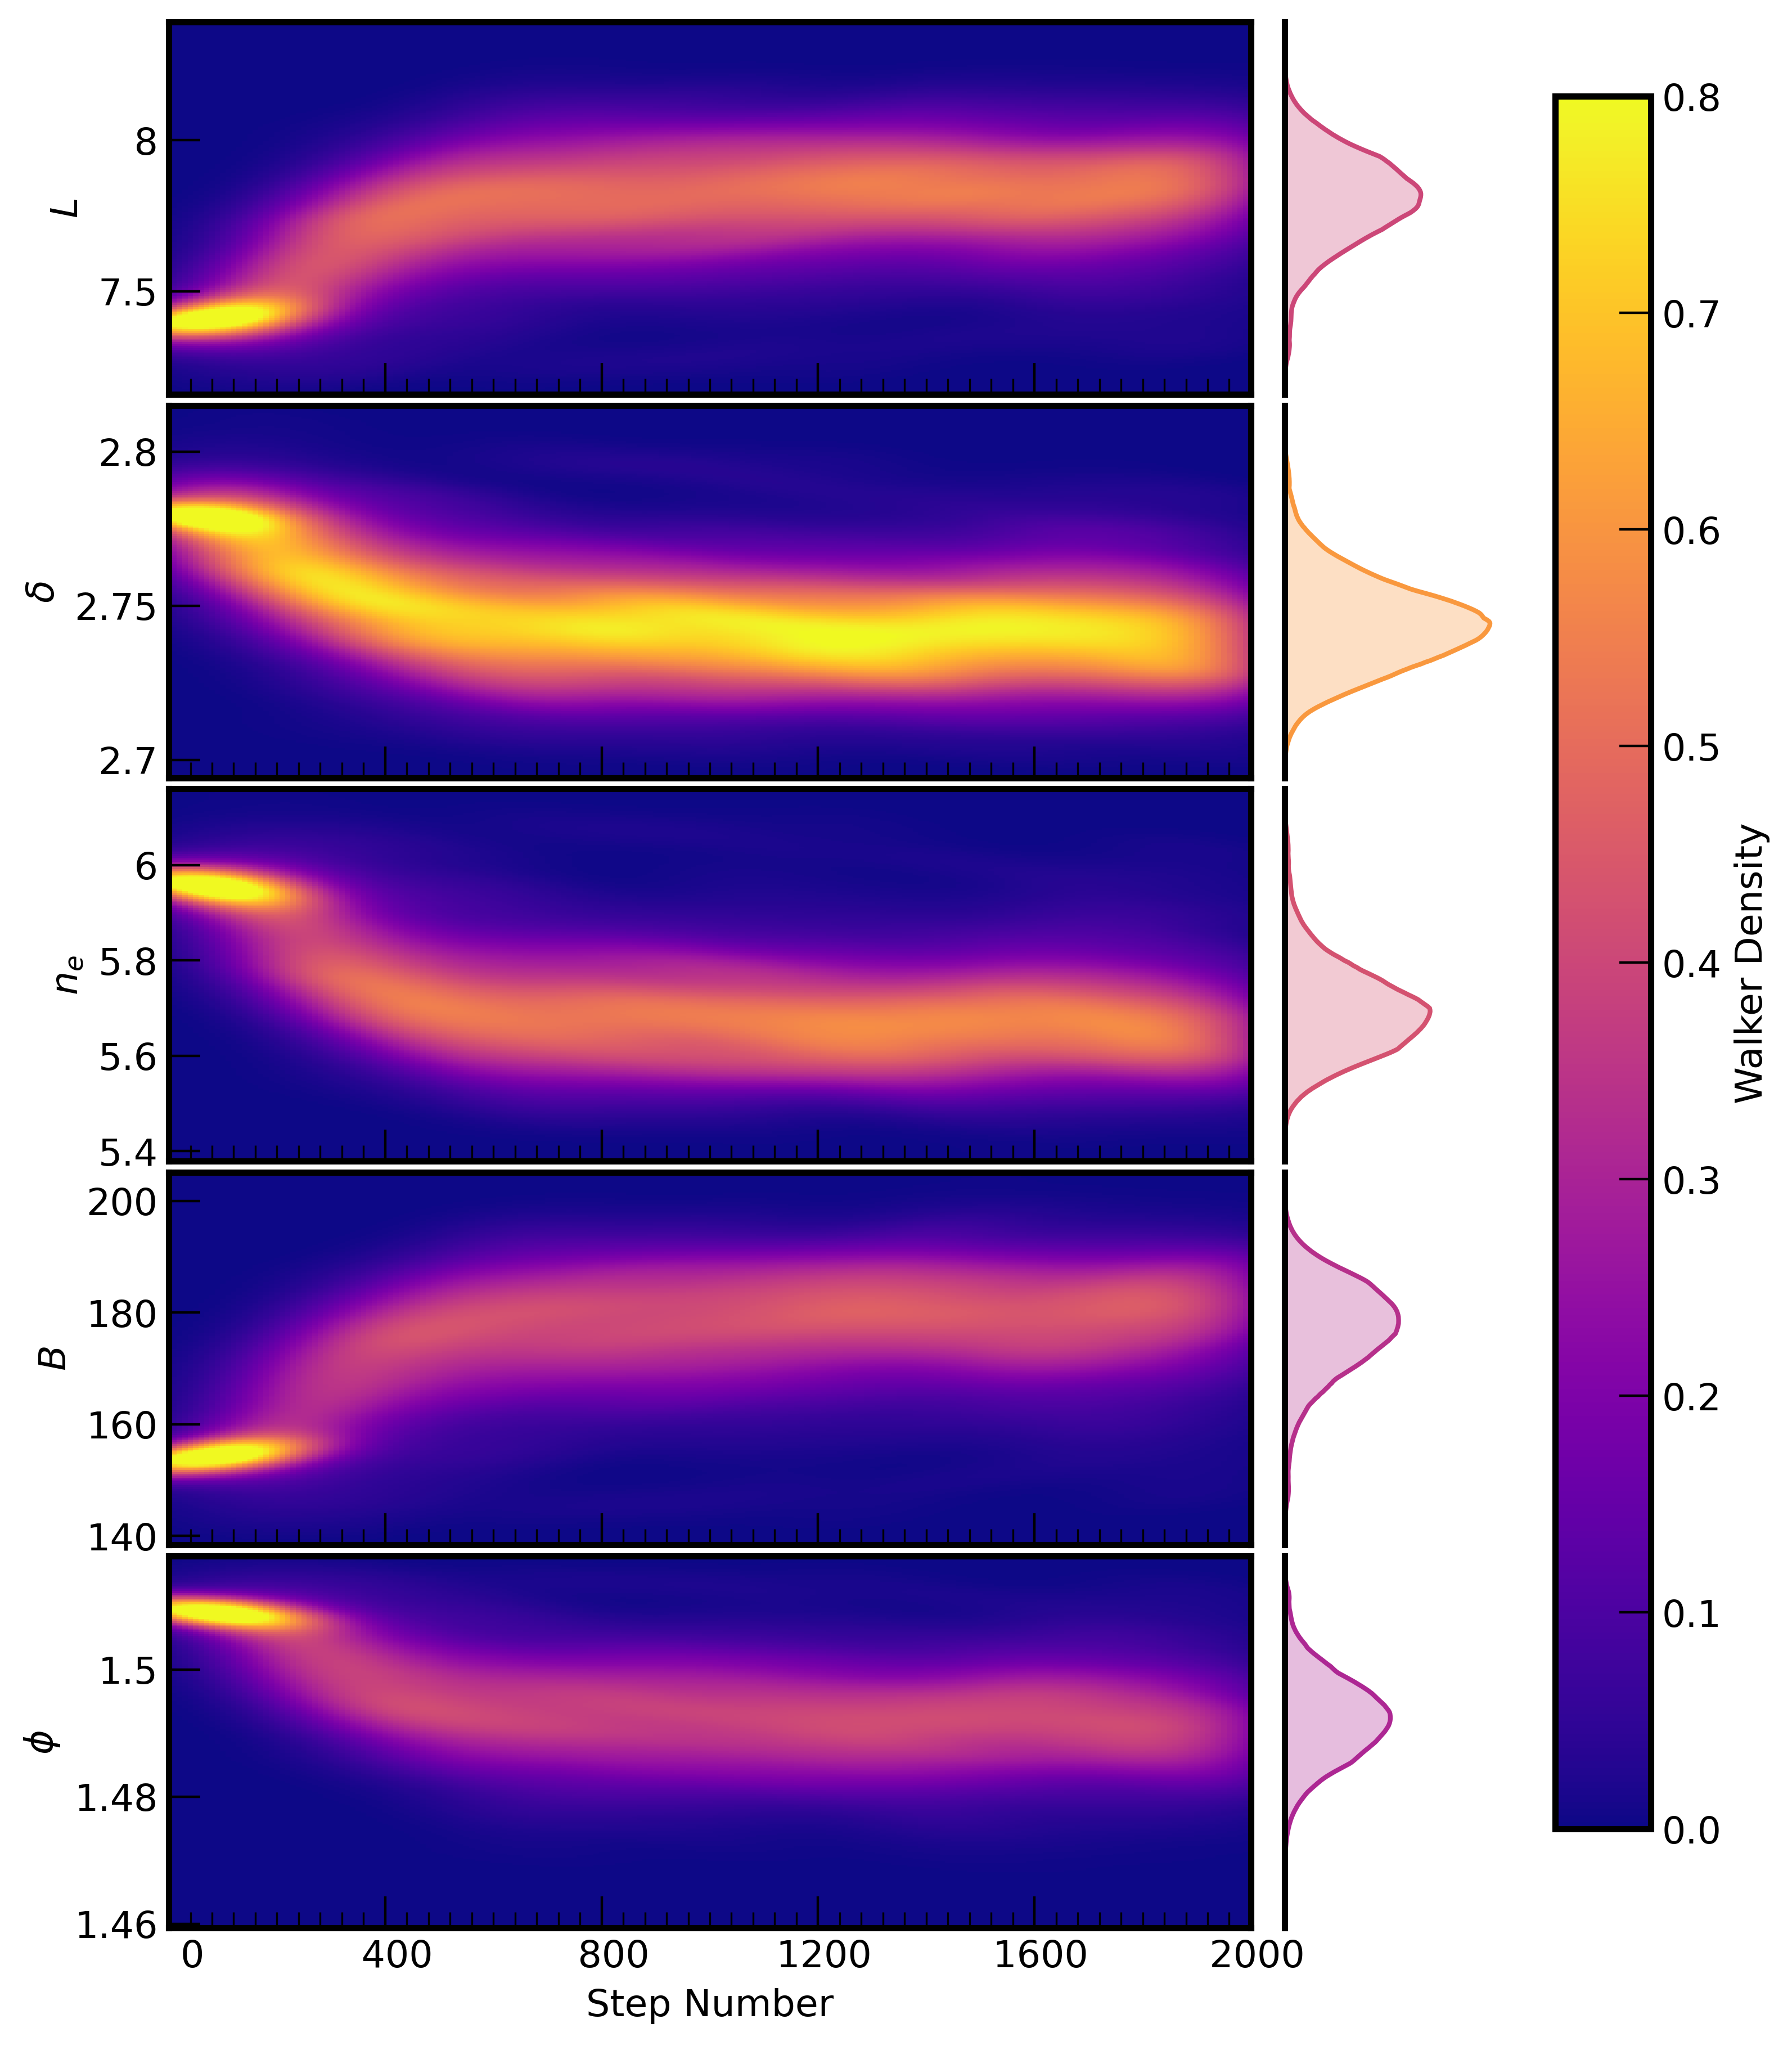

In [3]:
thin = 10
plt_labels = ['$L$', '$\delta$', '$n_e$', '$B$', '$\phi$']

fig, axes = plt.subplots(samples.shape[2], 2, figsize=(8.5, 11), gridspec_kw={'width_ratios': [4, 1]})
fig.subplots_adjust(hspace=0.03, wspace=0.05)

n = np.empty((int(samples.shape[0]/thin), samples.shape[1]))
for i in range(n.shape[0]):
    n[i] = np.full(1, (1+i)*thin)

for i in range(samples.shape[2]):
    ax = axes[i]

    nbins = [int(samples.shape[0]/thin), 200]
    x = n.flatten(); y = samples[::thin, :, i].flatten()
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins[0]*1j, y.min():y.max():nbins[1]*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi /= np.max(zi)
    zi = zi.reshape(xi.shape)
    
    im = ax[0].pcolormesh(xi, yi, zi.reshape(xi.shape), vmin=0, vmax=0.8, cmap='plasma', shading='auto', rasterized=True)

    ax[0].set_xlim(0, len(samples))
    ax[0].set_ylabel(r'%s' % plt_labels[i])
    ax[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(samples.shape[0]/5))
    ax[0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(samples.shape[0]/50))
    ax[0].xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax[0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))

    cmap = mpl.cm.get_cmap('plasma')
    rgba = cmap(np.max(np.median(zi, axis=0)))
    ax[1].plot(np.median(zi, axis=0), yi[0], color=rgba)
    ax[1].fill_betweenx(yi[0], 0, np.median(zi, axis=0), alpha=0.3, color=rgba)

    ax[1].set_xlim(0, 1)
    ax[1].xaxis.set_major_locator(mpl.ticker.NullLocator())
    ax[1].yaxis.set_major_locator(mpl.ticker.NullLocator())
    ax[1].xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax[1].yaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)

axes[-1][0].set_xlabel('Step Number')
axes[-1][0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%5.0f'))
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Walker Density')
fig.set_facecolor('white')
plt.savefig('../figures/ux-arietis_walkerplot_burnin.png', bbox_inches='tight')
plt.savefig('../figures/ux-arietis_walkerplot_burnin.pdf', bbox_inches='tight')
plt.show()